# Task 1


**Read csv file**

make csv file into a dictionary

In [1]:
def read_csv(file_name):
    row = 0
    d = {}
    lst = []
    header = []
    value = []
    with open(file_name, 'r') as file:
        for line in file:
            a = line.strip().split(',')
            a = [i.replace('\ufeff', '') for i in a]
            a = [i.replace('"','') for i in a]
            a = [i.replace(' 00:00:00','') for i in a]
            if row == 0:
                header.append(a)
            else:
                value.append(a)
                for i in range(len(line)):
                    try:
                        a[i] = float(a[i])
                    except (ValueError, IndexError):
                        continue
            row += 1
            
            #print(a[0])
            lst.append(a)
    d = {key: value for key, value in zip(*header, [(*zip(*lst[1:]))])}
    return d


barometer = read_csv('barometer-last-year.csv')
indoor = read_csv('indoor-temperature-last-year.csv')
outdoor = read_csv('outside-temperature-last-year.csv')
rainfall = read_csv('rainfall-last-year.csv')
#print(rainfall)

**Import Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Convert dictionaries into DataFrame**

In [3]:
def make_df(df):
    new_df = pd.DataFrame(data=df)
    return new_df

In [4]:
barometer = make_df(barometer)
indoor = make_df(indoor)
outdoor = make_df(outdoor)
rainfall = make_df(rainfall)

**Merge files**

In [5]:
b_r = barometer.merge(rainfall, how='left', on='DateTime')
b_r_o = b_r.merge(outdoor, how='left', on='DateTime')
df_all = b_r_o.merge(indoor, how='left', on='DateTime', suffixes=('_outdoor', '_indoor'))
df_all

,DateTime,Baro,mm,Temperature_outdoor,Temperature_range (low)_outdoor,Temperature_range (high)_outdoor,Humidity,Temperature_indoor,Temperature_range (low)_indoor,Temperature_range (high)_indoor
0,2016-10-09,1021.9,0.0,10.66000,7.2,13.8,54.0,21.93000,21.0,22.8
1,2016-10-10,1019.9,0.0,8.94000,5.6,12.8,52.0,21.77000,20.4,23.6
2,2016-10-11,1015.8,0.0,8.69000,5.3,14.3,51.0,21.36000,19.9,23.0
3,2016-10-12,1013.2,0.0,11.55000,9.0,14.9,51.0,21.44000,20.0,23.6
4,2016-10-13,1005.9,0.0,9.40000,6.0,13.3,52.0,21.22000,20.1,22.3
...,...,...,...,...,...,...,...,...,...,...
350,2017-10-05,1010.6,1.0,13.32000,10.0,17.2,56.0,21.34000,20.6,22.8
351,2017-10-06,1019.2,0.0,11.58000,7.2,17.6,54.0,21.34000,20.3,22.3
352,2017-10-07,1011.5,1.1,13.70000,11.7,16.4,55.0,21.34000,20.6,21.9
353,2017-10-08,1013.1,0.0,13.60000,9.6,21.7,55.0,21.81000,20.6,23.5


**Rename Columns**

In [6]:
df_all = df_all.rename(columns={"Baro": "Baro", "mm": "Rainfall", 
                            'Temperature_outdoor':'Outdoor Temp', 
                            'Temperature_range (low)_outdoor': 'Outdoor Temp(Min)', 
                            'Temperature_range (high)_outdoor':'Outdoor Temp(Max)',
                            'Humidity':'Humidity',
                            'Temperature_indoor':'Indoor Temp', 
                            'Temperature_range (low)_indoor': 'Indoor Temp(Min)', 
                            'Temperature_range (high)_indoor':'Indoor Temp(Max)',})
df_all.head()

,DateTime,Baro,Rainfall,Outdoor Temp,Outdoor Temp(Min),Outdoor Temp(Max),Humidity,Indoor Temp,Indoor Temp(Min),Indoor Temp(Max)
0,2016-10-09,1021.9,0.0,10.66,7.2,13.8,54.0,21.93,21.0,22.8
1,2016-10-10,1019.9,0.0,8.94,5.6,12.8,52.0,21.77,20.4,23.6
2,2016-10-11,1015.8,0.0,8.69,5.3,14.3,51.0,21.36,19.9,23.0
3,2016-10-12,1013.2,0.0,11.55,9.0,14.9,51.0,21.44,20.0,23.6
4,2016-10-13,1005.9,0.0,9.40,6.0,13.3,52.0,21.22,20.1,22.3


**Find out Min, Max, Mean, Standard Deviation and Percentile**

In [7]:
round(df_all.describe(),2)

,Baro,Rainfall,Outdoor Temp,Outdoor Temp(Min),Outdoor Temp(Max),Humidity,Indoor Temp,Indoor Temp(Min),Indoor Temp(Max)
count,355.00,353.00,355.00,355.00,355.00,354.00,354.00,354.00,354.00
mean,1010.00,1.55,11.14,7.87,15.52,48.52,21.83,20.56,23.53
std,9.87,3.32,5.36,4.88,7.03,5.19,2.06,2.41,1.70
min,979.60,0.00,-1.81,-4.10,1.50,37.00,18.04,14.90,19.70
25%,1004.85,0.00,7.39,4.35,10.25,44.00,20.34,18.72,22.50
50%,1010.50,0.00,10.96,8.00,15.10,48.00,21.71,20.60,23.20
75%,1016.05,1.10,15.05,12.05,19.85,52.00,22.71,21.90,24.10
max,1035.60,23.20,26.38,18.70,38.50,59.00,29.21,28.20,31.10


**Count Nans in each column**

In [8]:
df_all.isna().sum()

DateTime             0
Baro                 0
Rainfall             2
Outdoor Temp         0
Outdoor Temp(Min)    0
Outdoor Temp(Max)    0
Humidity             1
Indoor Temp          1
Indoor Temp(Min)     1
Indoor Temp(Max)     1
dtype: int64

**Correlation**

In [9]:
corr = df_all.corr()
round(corr, 2)

,Baro,Rainfall,Outdoor Temp,Outdoor Temp(Min),Outdoor Temp(Max),Humidity,Indoor Temp,Indoor Temp(Min),Indoor Temp(Max)
Baro,1.00,-0.48,-0.16,-0.20,-0.09,-0.20,-0.10,-0.14,-0.04
Rainfall,-0.48,1.00,0.02,0.08,-0.06,0.17,-0.02,0.04,-0.11
Outdoor Temp,-0.16,0.02,1.00,0.95,0.95,0.64,0.90,0.94,0.73
Outdoor Temp(Min),-0.20,0.08,0.95,1.00,0.84,0.69,0.83,0.89,0.64
Outdoor Temp(Max),-0.09,-0.06,0.95,0.84,1.00,0.54,0.90,0.90,0.78
Humidity,-0.20,0.17,0.64,0.69,0.54,1.00,0.48,0.57,0.25
Indoor Temp,-0.10,-0.02,0.90,0.83,0.90,0.48,1.00,0.98,0.91
Indoor Temp(Min),-0.14,0.04,0.94,0.89,0.90,0.57,0.98,1.00,0.83
Indoor Temp(Max),-0.04,-0.11,0.73,0.64,0.78,0.25,0.91,0.83,1.00


**Correlation Heatmap**

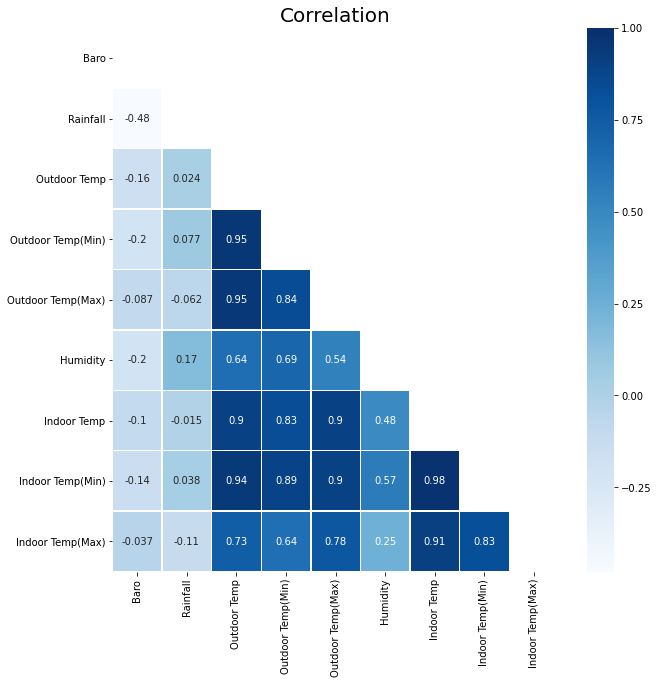

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
#ax = plt.figure(figsize=(10,10))
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True, linewidths=.5, cmap="Blues", mask=matrix)
plt.title('Correlation', fontsize=20)
fig.savefig('Correlation Graph.png')

**Correlation Scatter Plot**

Text(0.5, 1.0, 'Rainfall vs Barometric Pressure')

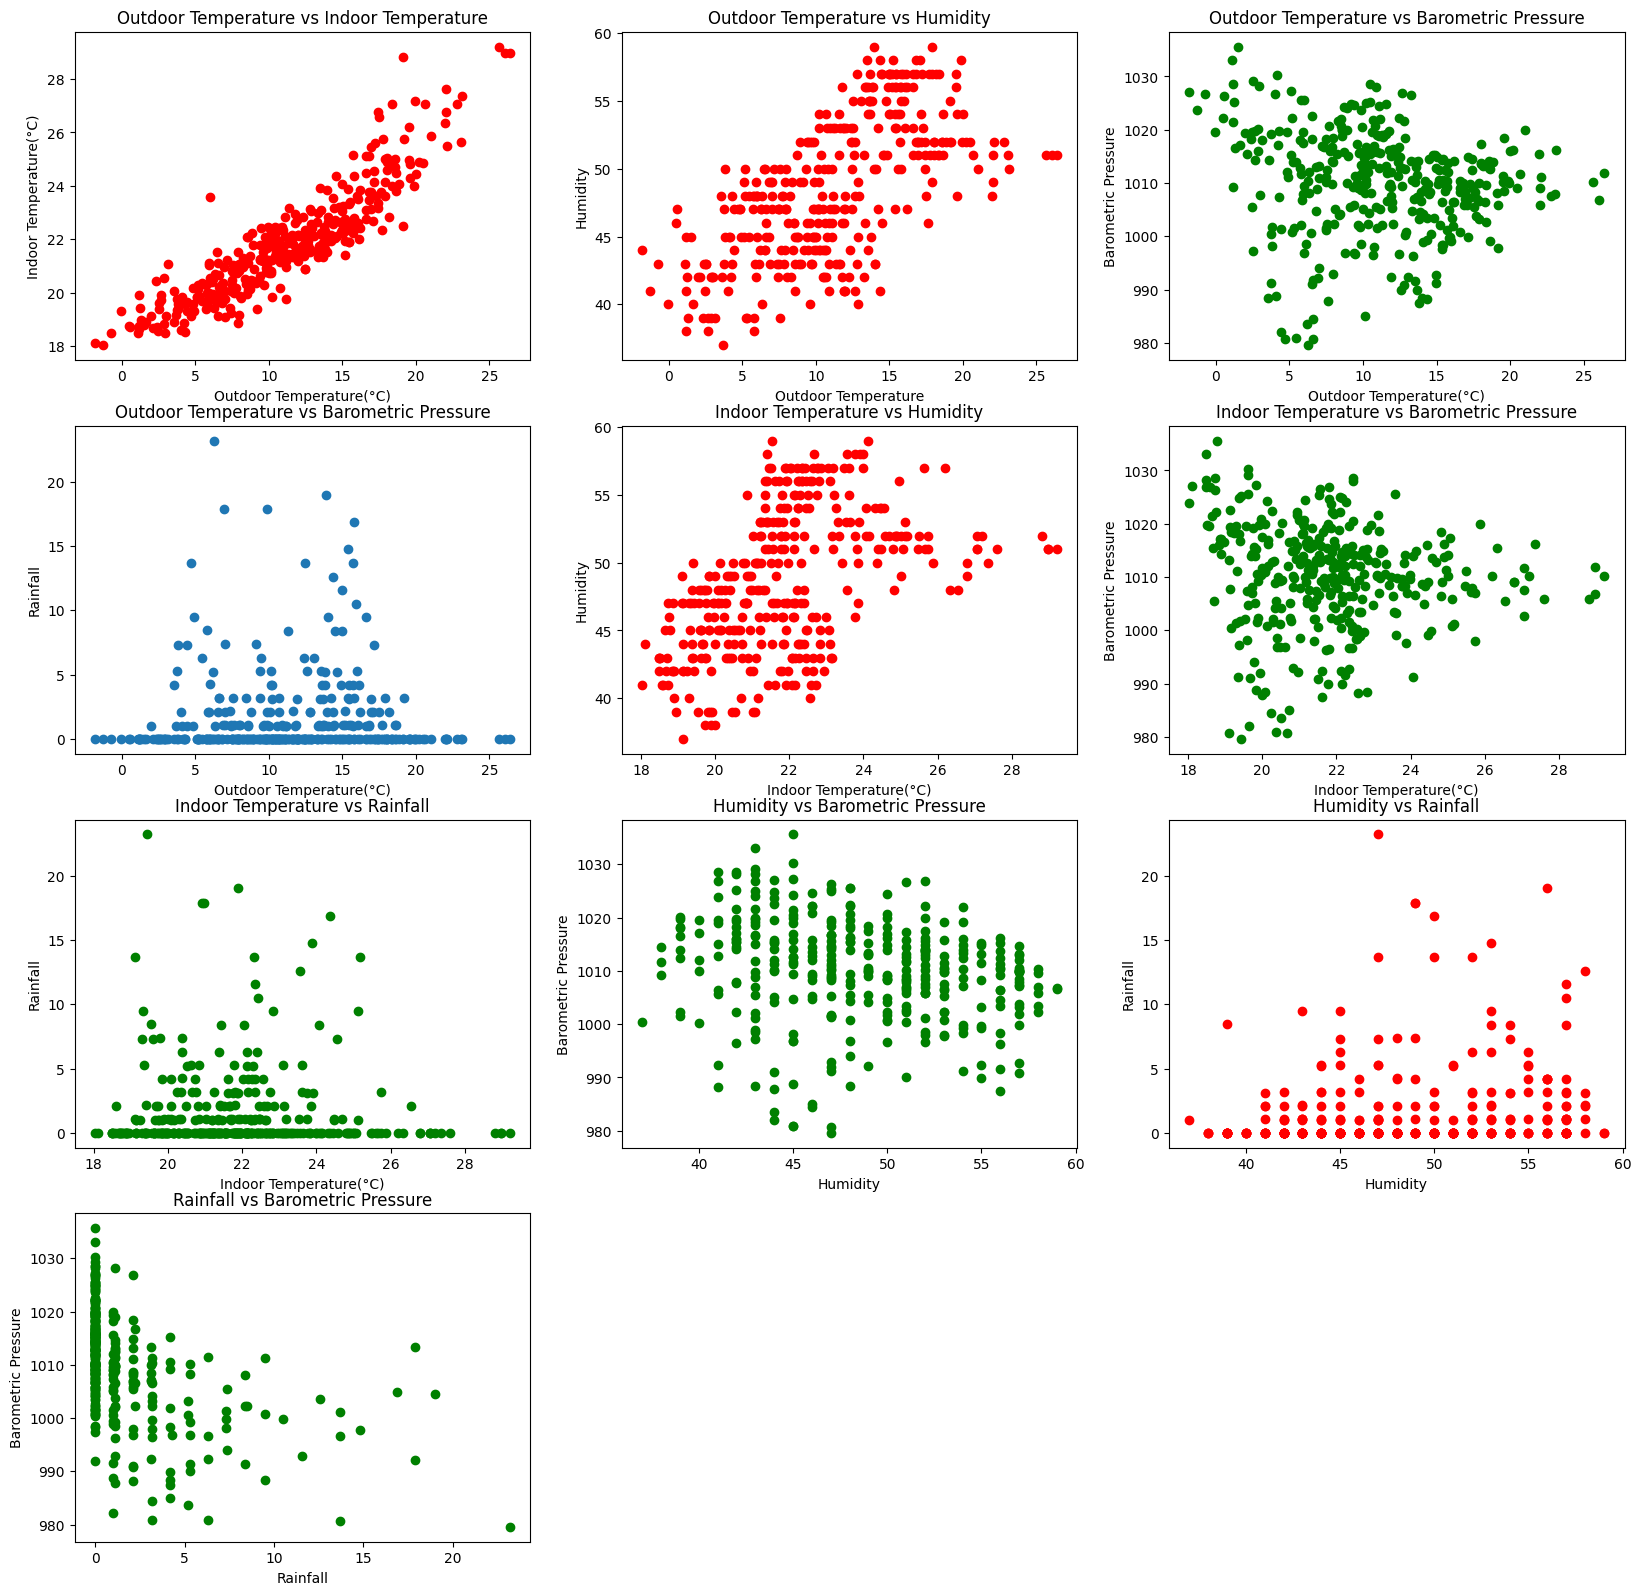

In [11]:
fig, ax = plt.subplots(figsize=(20,20), dpi=100)

ax = plt.subplot(4,3,1)
ax = plt.scatter(df_all['Outdoor Temp'], df_all['Indoor Temp'], color='r')
plt.xlabel('Outdoor Temperature(°C)')
plt.ylabel('Indoor Temperature(°C)')
plt.title('Outdoor Temperature vs Indoor Temperature', fontsize=12)

ax = plt.subplot(4,3,2)
ax = plt.scatter(df_all['Outdoor Temp'], df_all['Humidity'], color='r')
plt.xlabel('Outdoor Temperature')
plt.ylabel('Humidity')
plt.title('Outdoor Temperature vs Humidity', fontsize=12)

ax = plt.subplot(4,3,3)
ax = plt.scatter(df_all['Outdoor Temp'], df_all['Baro'], color='g')
plt.xlabel('Outdoor Temperature(°C)')
plt.ylabel('Barometric Pressure')
plt.title('Outdoor Temperature vs Barometric Pressure', fontsize=12)

ax = plt.subplot(4,3,4)
ax = plt.scatter(df_all['Outdoor Temp'], df_all['Rainfall'])
plt.xlabel('Outdoor Temperature(°C)')
plt.ylabel('Rainfall')
plt.title('Outdoor Temperature vs Barometric Pressure', fontsize=12)

ax = plt.subplot(4,3,5)
ax = plt.scatter(df_all['Indoor Temp'], df_all['Humidity'], color='r')
plt.xlabel('Indoor Temperature(°C)')
plt.ylabel('Humidity')
plt.title('Indoor Temperature vs Humidity', fontsize=12)

ax = plt.subplot(4,3,6)
ax = plt.scatter(df_all['Indoor Temp'], df_all['Baro'], color='g')
plt.xlabel('Indoor Temperature(°C)')
plt.ylabel('Barometric Pressure')
plt.title('Indoor Temperature vs Barometric Pressure', fontsize=12)

ax = plt.subplot(4,3,7)
ax = plt.scatter(df_all['Indoor Temp'], df_all['Rainfall'], color='g')
plt.xlabel('Indoor Temperature(°C)')
plt.ylabel('Rainfall')
plt.title('Indoor Temperature vs Rainfall', fontsize=12)

ax = plt.subplot(4,3,8)
ax = plt.scatter(df_all['Humidity'], df_all['Baro'], color='g')
plt.xlabel('Humidity')
plt.ylabel('Barometric Pressure')
plt.title('Humidity vs Barometric Pressure', fontsize=12)

ax = plt.subplot(4,3,9)
ax = plt.scatter(df_all['Humidity'], df_all['Rainfall'], color='r')
plt.xlabel('Humidity')
plt.ylabel('Rainfall')
plt.title('Humidity vs Rainfall', fontsize=12)

ax = plt.subplot(4,3,10)
ax = plt.scatter(df_all['Rainfall'], df_all['Baro'], color='g')
plt.xlabel('Rainfall')
plt.ylabel('Barometric Pressure')
plt.title('Rainfall vs Barometric Pressure', fontsize=12)

#fig.savefig('Correlation Graph_2.png')

Extend your code to summarise the data into monthly and seasonable values. From this summary data construct two separate infographics. One using the monthly values and one using the seasonal values. These should convey the
summarised data for all the weather components concisely and clearly. Provide a brief report (one page) than justifies the visual mappings you’ve used.

**Change DateTime into Datetime Index**

In [12]:
df_all['DateTime'] = pd.to_datetime(df_all['DateTime'])
#df_all

**Find all the NaNs**

In [13]:
df_all[df_all.isnull().any(axis=1)]

,DateTime,Baro,Rainfall,Outdoor Temp,Outdoor Temp(Min),Outdoor Temp(Max),Humidity,Indoor Temp,Indoor Temp(Min),Indoor Temp(Max)
73,2016-12-22,1019.6,NaN,4.84,1.7,7.9,47.0,19.56,17.6,21.7
218,2017-05-17,1009.5,NaN,12.67,9.7,14.5,48.0,22.20,21.6,23.0
284,2017-07-22,999.4,1.0,14.36,10.6,18.5,NaN,NaN,NaN,NaN


**Fill NaNs surrounded by valid values**

In [14]:
df_all = df_all.interpolate()
#df_all[df_all.isnull().any(axis=1)]

# Task 2

**Seperate dataframe into Monthly and Seasonal**

In [15]:
df_all['Month_num'] = df_all['DateTime'].dt.month
df_all.head()

,DateTime,Baro,Rainfall,Outdoor Temp,Outdoor Temp(Min),Outdoor Temp(Max),Humidity,Indoor Temp,Indoor Temp(Min),Indoor Temp(Max),Month_num
0,2016-10-09,1021.9,0.0,10.66,7.2,13.8,54.0,21.93,21.0,22.8,10
1,2016-10-10,1019.9,0.0,8.94,5.6,12.8,52.0,21.77,20.4,23.6,10
2,2016-10-11,1015.8,0.0,8.69,5.3,14.3,51.0,21.36,19.9,23.0,10
3,2016-10-12,1013.2,0.0,11.55,9.0,14.9,51.0,21.44,20.0,23.6,10
4,2016-10-13,1005.9,0.0,9.40,6.0,13.3,52.0,21.22,20.1,22.3,10


**define a function for seasonal**
- Feb to Apr is Spring
- May to Jul is Summer
- Aug to Oct is Autumn
- Nov to Jan is Winter

In [16]:
def season_f(row):
    if row['Month_num'] < 5 and row['Month_num'] > 1:
        val = 'Spring'
    elif row['Month_num'] < 8 and row['Month_num'] > 4:
        val = 'Summer'
    elif row['Month_num'] < 11 and row['Month_num'] > 7:
        val = 'Autumn'
    else:
        val = 'Winter'
    return val

In [17]:
def month_f(row):
    if row['Month_num'] == 1:
        val = 'Jan'
    elif row['Month_num'] == 2:
        val = 'Feb'
    elif row['Month_num'] == 3:
        val = 'Mar'
    elif row['Month_num'] == 4:
        val = 'Apr'
    elif row['Month_num'] == 5:
        val = 'May'
    elif row['Month_num'] == 6:
        val = 'Jun'
    elif row['Month_num'] == 7:
        val = 'Jul'
    elif row['Month_num'] == 8:
        val = 'Aug'
    elif row['Month_num'] == 9:
        val = 'Sep'
    elif row['Month_num'] == 10:
        val = 'Oct'
    elif row['Month_num'] == 11:
        val = 'Nov'
    else:
        val = 'Dec'
    return val

**Make now coloumns for season and month**

In [18]:
df_all['Season'] = df_all.apply(season_f, axis=1)
df_all['Month'] = df_all.apply(month_f, axis=1)
df_all.head()

,DateTime,Baro,Rainfall,Outdoor Temp,Outdoor Temp(Min),Outdoor Temp(Max),Humidity,Indoor Temp,Indoor Temp(Min),Indoor Temp(Max),Month_num,Season,Month
0,2016-10-09,1021.9,0.0,10.66,7.2,13.8,54.0,21.93,21.0,22.8,10,Autumn,Oct
1,2016-10-10,1019.9,0.0,8.94,5.6,12.8,52.0,21.77,20.4,23.6,10,Autumn,Oct
2,2016-10-11,1015.8,0.0,8.69,5.3,14.3,51.0,21.36,19.9,23.0,10,Autumn,Oct
3,2016-10-12,1013.2,0.0,11.55,9.0,14.9,51.0,21.44,20.0,23.6,10,Autumn,Oct
4,2016-10-13,1005.9,0.0,9.40,6.0,13.3,52.0,21.22,20.1,22.3,10,Autumn,Oct


**Seasonal Table**

In [19]:
avg_season = round(df_all.groupby('Season').mean(),2)
avg_season.reset_index(inplace=True)
#avg_season = avg_season.sort_values('Month_num')

sorter = ['Spring', 'Summer', 'Autumn', 'Winter']

avg_season['Season'] = avg_season['Season'].astype("category")
avg_season['Season'].cat.set_categories(sorter, inplace=True)
avg_season = avg_season.drop(columns = 'Month_num')
avg_season = avg_season.sort_values(["Season"])

In [20]:
avg_season

,Season,Baro,Rainfall,Outdoor Temp,Outdoor Temp(Min),Outdoor Temp(Max),Humidity,Indoor Temp,Indoor Temp(Min),Indoor Temp(Max)
1,Spring,1009.29,0.80,8.58,5.45,12.77,44.41,21.18,19.67,23.28
2,Summer,1007.24,1.99,16.75,12.47,22.96,49.89,24.15,23.25,25.26
0,Autumn,1009.55,1.66,13.66,10.54,18.25,54.71,22.17,21.30,23.27
3,Winter,1013.88,1.70,5.61,3.07,8.15,45.46,19.80,18.03,22.27


**Monthly Table**

In [21]:
avg_month = round(df_all.groupby('Month').mean(),2)
avg_month.reset_index(inplace=True)
avg_month = avg_month.sort_values('Month_num')
avg_month = avg_month.drop(columns = 'Month_num')

In [22]:
avg_month

,Month,Baro,Rainfall,Outdoor Temp,Outdoor Temp(Min),Outdoor Temp(Max),Humidity,Indoor Temp,Indoor Temp(Min),Indoor Temp(Max)
4,Jan,1015.42,1.16,4.42,1.78,7.09,42.48,19.56,17.53,22.71
3,Feb,1005.76,1.16,6.31,4.34,8.91,43.18,20.25,18.57,22.90
7,Mar,1006.50,1.02,8.98,5.96,13.26,46.27,21.13,19.62,23.29
0,Apr,1015.37,0.24,10.31,5.99,15.89,43.70,22.10,20.73,23.63
8,May,1008.86,1.36,14.53,10.04,21.13,45.10,23.20,22.18,24.44
6,Jun,1006.08,1.51,17.60,13.20,23.57,51.53,24.70,23.80,25.80
5,Jul,1006.75,3.09,18.16,14.20,24.21,53.08,24.56,23.77,25.57
1,Aug,1009.11,1.72,16.66,13.09,22.43,57.00,23.49,22.73,24.57
11,Sep,1005.85,2.39,14.13,10.82,19.02,55.17,22.07,21.30,22.98
10,Oct,1013.33,0.93,11.15,8.54,14.65,52.72,21.36,20.32,22.65


**Temperature & Humidity Graph**

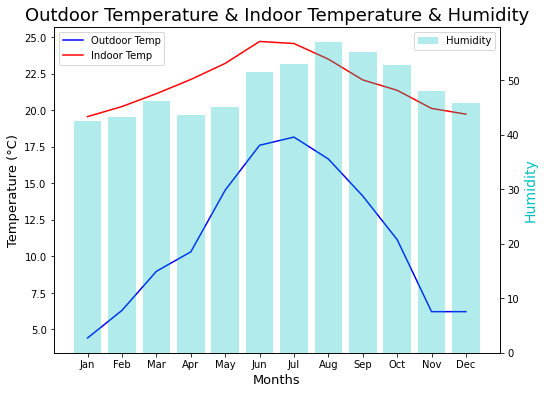

In [23]:
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(avg_month['Month'], avg_month['Outdoor Temp'], label='Outdoor Temp', color ='b')
ax.plot(avg_month['Month'], avg_month['Indoor Temp'], label='Indoor Temp', color ='r')
plt.legend(loc = 2)
ax.set_xlabel('Months', fontsize=13)
ax.set_ylabel('Temperature (°C)', fontsize=13)
ax.set_title('Outdoor Temperature & Indoor Temperature & Humidity', fontsize=18)
ax2=ax.twinx()
ax2.bar(avg_month['Month'], avg_month['Humidity'],color="c", alpha=0.3, label='Humidity')
ax2.set_ylabel("Humidity",color="c",fontsize=14)
plt.legend(loc = 0)
plt.show()
fig.savefig('Graph 3.png')

**Barometric Pressure & Rainfall Graph**

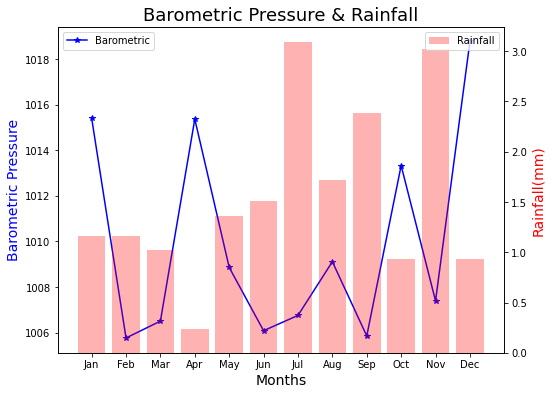

In [24]:
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(avg_month['Month'], avg_month['Baro'], color="b", marker="*", label='Barometric')
ax.set_xlabel("Months",fontsize=14)
ax.set_ylabel("Barometric Pressure",color="b",fontsize=14)
ax.set_title('Barometric Pressure & Rainfall', fontsize=18)
plt.legend(loc = 2)
ax2=ax.twinx()
ax2.bar(avg_month['Month'], avg_month['Rainfall'],color="r", alpha=0.3, label='Rainfall')
ax2.set_ylabel("Rainfall(mm)",color="r",fontsize=14)
plt.legend(loc = 1)
plt.show()
fig.savefig('Graph 4.png')

**Seasonal Rainfall Graph**

Text(0.5, 1.0, 'Seasonal Rainfall')

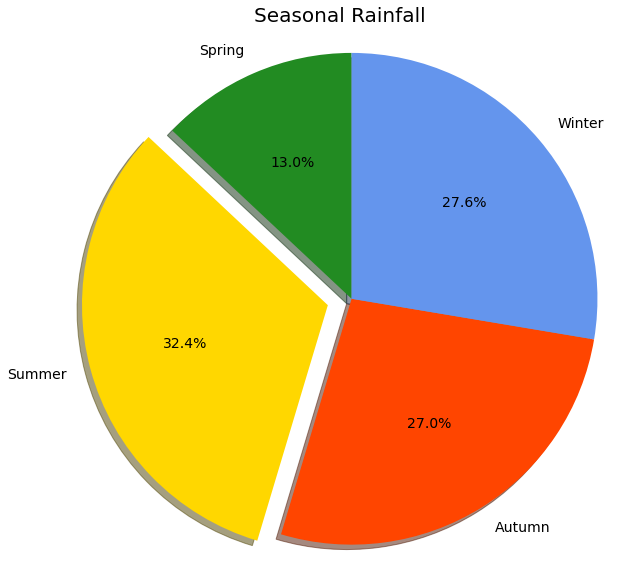

In [25]:
fig1, ax1 = plt.subplots(figsize=(10,10))

labels = 'Spring', 'Summer', 'Autumn', 'Winter'
colors = ['forestgreen', 'gold', 'orangered', 'cornflowerblue']
explode = [0, 0.1, 0, 0]
ax1.pie(avg_season['Rainfall'], explode=explode, labels=labels, colors=colors,  autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Seasonal Rainfall', fontsize=20)
#fig1.savefig('Graph 5.png')

**Monthly Rainfall Graph**

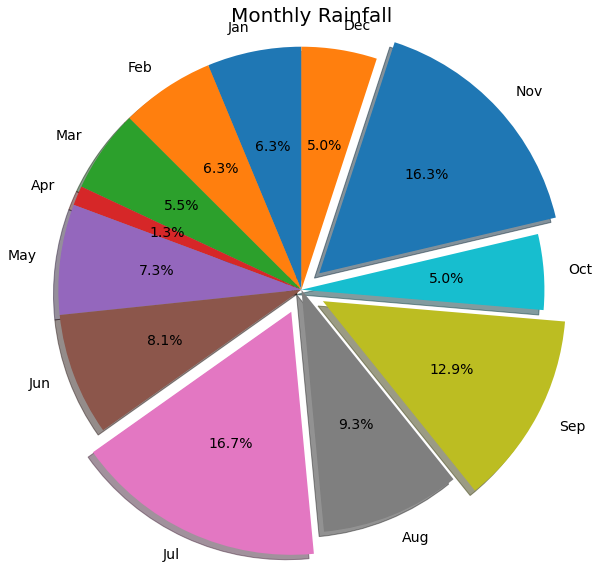

In [26]:
fig1, ax = plt.subplots(figsize=(10,10))

labels = 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
explode = [ 0, 0, 0, 0, 0, 0, 0.1, 0, 0.1, 0, 0.1, 0]

ax.pie(avg_month['Rainfall'], explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 14})
ax.axis('equal')

plt.title('Monthly Rainfall', fontsize=20)

plt.show()
#fig1.savefig('Graph 6.png')

**Seasonal Temperature Stack plot**

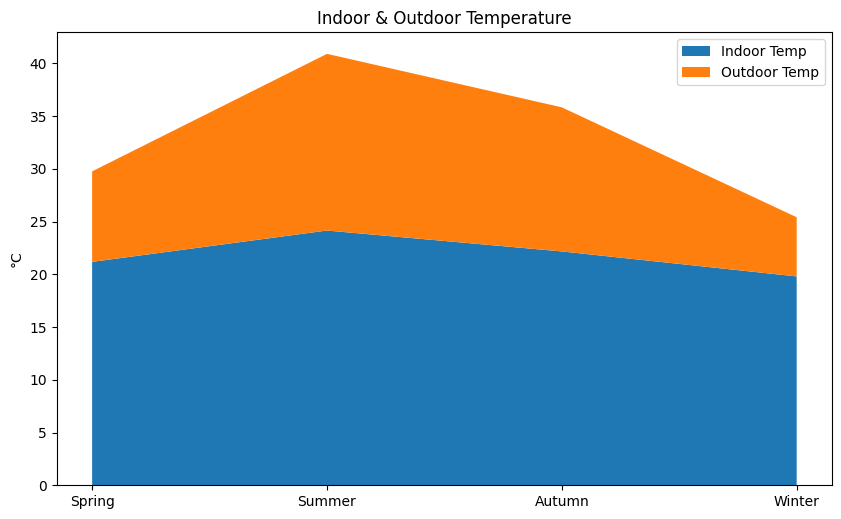

In [27]:
fig, ax = plt.subplots(figsize=(10,6), dpi=100)

#plt.figure(figsize=(10,6))
plt.stackplot(avg_season['Season'], avg_season['Indoor Temp'], avg_season['Outdoor Temp'], labels=['Indoor Temp', 'Outdoor Temp'])
plt.ylabel('°C')
plt.title('Indoor & Outdoor Temperature')
plt.legend(loc=0)
plt.show()
#fig.savefig('Indoor & Outdoor Temp.png')

**Monthly Temperature Stack plot**

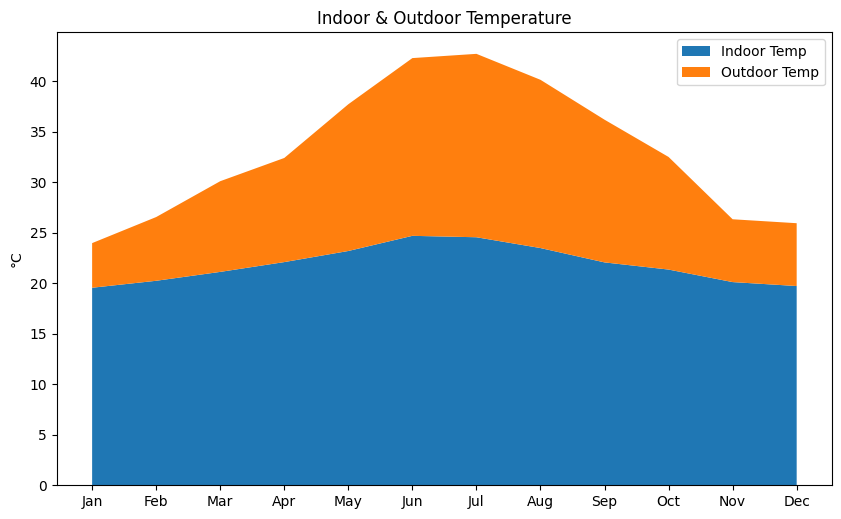

In [28]:
fig, ax = plt.subplots(figsize=(10,6), dpi=100)
plt.stackplot(avg_month['Month'], avg_month['Indoor Temp'], avg_month['Outdoor Temp'], labels=['Indoor Temp', 'Outdoor Temp'])
plt.ylabel('°C')
plt.title('Indoor & Outdoor Temperature')
plt.legend(loc=0)
plt.show()
#fig.savefig('Indoor & Outdoor Temp_month.png')

**Monthly Average Rainfall Bar Chart**

Text(0, 0.5, 'mm')

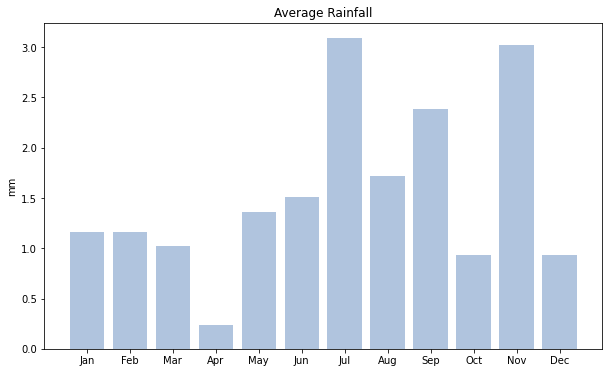

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(avg_month['Month'], avg_month['Rainfall'], color='lightsteelblue')
plt.title('Average Rainfall')
plt.ylabel('mm')
#fig.savefig('Rainfall month.png')